<a href="https://colab.research.google.com/github/SanzogniCarlo/Algorithms-For-Massive-Data/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###load kaggle api file
from google.colab import files

uploaded = files.upload()

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
###download dataset from kaggle
dataset=api.dataset_download_file(dataset='census/2013-american-community-survey', file_name='ss13husa.csv',quiet=False,force=True)
dataset=api.dataset_download_file(dataset='census/2013-american-community-survey', file_name='ss13husb.csv',quiet=False,force=True)
!unzip ss13husa.csv
!unzip ss13husb.csv

  2%|▏         | 3.00M/134M [00:00<00:04, 27.6MB/s]

100%|██████████| 134M/134M [00:02<00:00, 50.2MB/s]


  6%|▌         | 8.00M/128M [00:00<00:01, 81.9MB/s]

100%|██████████| 128M/128M [00:03<00:00, 41.3MB/s]



Archive:  ss13husa.csv.zip
  inflating: ss13husa.csv            
Archive:  ss13husb.csv.zip
  inflating: ss13husb.csv            


In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
df1= pd.read_csv('ss13husa.csv',)
df2= pd.read_csv('ss13husb.csv')
df=pd.merge(df1, df2, how='outer')

In [ ]:
df=df.iloc[:,4:151]###dropping wgtp
df=df.drop(['ST','HINCP','ADJHSG','ADJINC'], axis=1)##dropping adjustment factors and other objective variables

In [ ]:
df=df.dropna(axis=0, subset=['FINCP']).reset_index()#drop raw with target variable null
df=df.dropna(axis=1, how='all')#drop columns all null
df = df.fillna(0)#fill remaining null values with 0s

In [ ]:
features = df.drop('FINCP',axis=1)
x =features.values# Separating out the features
y = df['FINCP'].values# Separating out the target
x = StandardScaler().fit_transform(x)# Standardizing the features
dfs=pd.DataFrame(data=x)

In [ ]:
pca = PCA(n_components=20)#set number of components
principalComponents = pca.fit_transform(x)#fit the PCA

dfPCA = pd.DataFrame(data = principalComponents)
#dfPCA

In [ ]:
dfinal = pd.concat([dfPCA, df['FINCP']],axis=1)
dfinal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,FINCP
0,-1.364719,0.162359,-1.218636,-1.085856,-0.720737,0.199410,0.554713,-0.064107,3.720604,0.027450,-0.215377,0.955176,-0.406632,-2.970344,0.054521,-0.922683,0.172016,0.452520,-0.054526,1.219605,151000.0
1,5.936145,-1.884891,-2.318114,4.383122,2.018517,-1.395294,-1.538207,3.545066,1.656559,0.419367,-0.336327,-3.451492,-2.269772,2.040297,3.949621,4.826483,0.190947,0.800753,-6.095926,0.908280,11400.0
2,2.578135,12.638984,2.555071,0.919779,-14.225956,3.473364,-9.176608,1.820436,-3.060631,0.130002,-3.984922,-2.480572,-0.041602,-5.068938,2.534582,-3.485144,1.842076,-6.227674,-2.243943,-3.606027,136000.0
3,-0.939957,-0.406730,-3.125263,-3.099964,-1.006819,0.421665,-0.173115,2.169624,0.791913,-1.273753,-0.625057,0.121397,1.322592,1.346886,0.349242,0.223979,1.309848,-0.387749,0.382666,0.559673,52600.0
4,-3.157383,1.443383,-1.809193,-0.528366,-0.618987,0.104247,0.590160,-0.871279,1.408183,1.225438,1.240272,-0.812390,-2.083282,-1.087764,-0.082135,-0.147780,-0.664852,-0.897876,-0.256362,-0.328976,81600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812463,2.255156,-3.698867,4.800880,0.488739,-0.618309,0.005424,-0.405252,-0.710787,1.573450,-1.749804,-0.732162,-0.074795,1.107100,0.389373,-0.944043,0.206205,-1.423238,-1.112694,0.472471,0.123299,30000.0
812464,1.902353,-3.409294,4.180713,-0.808947,-1.283998,0.321303,-0.055427,-1.843681,2.211413,-0.721458,-0.343744,-1.417437,0.786776,-0.541794,-0.397236,1.673684,0.854681,-1.190929,0.470028,0.332671,63000.0
812465,-0.558363,0.387206,-2.203753,-1.630456,-0.735804,0.183010,1.035093,-0.615407,2.719490,-0.609539,0.378898,2.112145,-1.304588,-1.583747,-1.074725,-0.625779,-0.650428,-0.137554,-0.597620,-0.040149,39300.0
812466,-1.776992,-1.212249,2.705387,1.111815,-0.176853,-0.031319,-0.940911,0.084385,-0.650428,-2.437314,-0.708475,1.076402,-0.468126,1.284068,-1.777820,-0.118765,-0.333688,-0.246623,-0.779666,0.296016,39700.0


In [ ]:
pca.explained_variance_ratio_

array([0.09564553, 0.09437593, 0.06702964, 0.05055826, 0.04097488,
       0.0376618 , 0.03312008, 0.02799707, 0.02397417, 0.01938291,
       0.01745578, 0.0158183 , 0.01470025, 0.013016  , 0.01238823,
       0.01187811, 0.01143486, 0.01118061, 0.01048245, 0.01014975])

In [ ]:
# Split dataset
train, test, trainTarget, testTarget = train_test_split( dfPCA,df['FINCP'] , test_size=1/7.0, random_state=0)

In [ ]:
scaler=MinMaxScaler()
scalertarget=MinMaxScaler()
train_scaled=scaler.fit_transform(train)#fit and scale the train
test_scaled=scaler.transform(test)#scaled the target on the train

trainTarget=pd.DataFrame(trainTarget)
testTarget=pd.DataFrame(testTarget)

trainTarget_scaled=scalertarget.fit_transform(trainTarget)#fit and scale the target train
testTarget_scaled=scalertarget.transform(testTarget)#scale the target test on the train

In [ ]:
#scalefinal = pd.concat([pd.DataFrame(train_scaled), pd.DataFrame(trainTarget_scaled)],axis=1)
#scalefinal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0
0,0.318647,0.127810,0.122800,0.462004,0.520904,0.043927,0.420530,0.505821,0.319425,0.390586,0.465574,0.476714,0.551797,0.354788,0.433908,0.440497,0.509796,0.459715,0.443230,0.470467,0.010035
1,0.416204,0.193979,0.184739,0.408267,0.575725,0.033511,0.444635,0.315442,0.199354,0.427291,0.364938,0.660122,0.314927,0.440533,0.489495,0.459857,0.616496,0.684160,0.260828,0.479017,0.022248
2,0.295659,0.076039,0.552322,0.381608,0.465233,0.062743,0.452209,0.373344,0.583054,0.302988,0.415557,0.426800,0.426048,0.377929,0.403639,0.482716,0.482456,0.441203,0.451073,0.477312,0.081629
3,0.321404,0.147669,0.105922,0.427728,0.506348,0.046600,0.459915,0.365112,0.561216,0.326720,0.427912,0.544563,0.427141,0.373428,0.391449,0.438666,0.361695,0.456469,0.392048,0.336083,0.034653
4,0.287103,0.117478,0.425341,0.370918,0.479473,0.058198,0.487073,0.490255,0.515020,0.240778,0.493052,0.536633,0.398113,0.461441,0.399337,0.517061,0.512862,0.467171,0.366153,0.369768,0.084274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696396,0.311471,0.135913,0.129603,0.463748,0.518065,0.043485,0.426505,0.361310,0.338538,0.395281,0.439977,0.451305,0.334371,0.445419,0.392843,0.463198,0.305127,0.472783,0.437032,0.370422,0.027777
696397,0.262954,0.136035,0.430010,0.422481,0.500100,0.050613,0.529713,0.570998,0.395073,0.348551,0.538691,0.498835,0.281237,0.437919,0.546400,0.414337,0.356888,0.448192,0.407133,0.474079,0.036432
696398,0.248245,0.103971,0.484808,0.372224,0.471605,0.064977,0.444653,0.436690,0.495585,0.301023,0.416216,0.574451,0.515635,0.421409,0.414334,0.462566,0.463516,0.469702,0.503220,0.485130,0.048933
696399,0.223616,0.128963,0.338667,0.336643,0.464198,0.064217,0.469150,0.375193,0.415288,0.360769,0.407157,0.424617,0.282580,0.412758,0.384522,0.481401,0.400946,0.443665,0.479461,0.465365,0.044159


In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 168       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 134,313
Trainable params: 134,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(train_scaled, trainTarget_scaled, epochs=15, batch_size=5, verbose=1, validation_split=0.2)
predictions = model.predict(test_scaled)

Epoch 1/15
111424/111424 [==============================] - 253s 2ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0208 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0188
Epoch 2/15
111424/111424 [==============================] - 252s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0196 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0199
Epoch 3/15
111424/111424 [==============================] - 256s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0194 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0181
Epoch 4/15
111424/111424 [==============================] - 253s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0193 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0194
Epoch 5/15
111424/111424 [==============================] - 256s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0192 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0188
Epoch 6/15
111424/111424 [==============================] - 253s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0193 - val_loss: 0.0011 - va

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


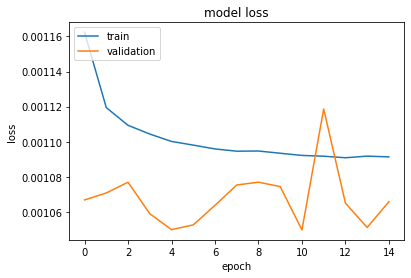

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

predictionstrain = model.predict(train_scaled)

y_pred = scalertarget.inverse_transform(predictions)

In [ ]:
y_true = scalertarget.inverse_transform(testTarget_scaled)

In [ ]:
import sklearn.metrics
r2_score = sklearn.metrics.r2_score(testTarget_scaled, predictions)
r2_scoret = sklearn.metrics.r2_score(trainTarget_scaled, predictionstrain)
print('r2_score on test: {0}'.format(r2_score))
print('r2_score on train: {0}'.format(r2_scoret))


r2_score on test: 0.6034100150436736
r2_score on train: 0.6042510203190618
